In [28]:
#preprocessing permite trabajar el minmaxscaler
from sklearn import preprocessing
# mse para calcular el mse
from sklearn.metrics import mean_absolute_error
#load_model para leer el modelo :v
from keras.models import load_model
#jolib permite leer el scaler que se usó para y
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

# lee el modelo
fit1 = load_model('lstm.h5')
fit2 = load_model('lstms.h5')
fit3 = load_model('lstm_s.h5')
fit4 = load_model('lstm_ss.h5')
fit5 = load_model('grus.h5')
# lee el scaler
scaler_y = joblib.load('scaler.save')
# presenta la arquitectura del modelo

Definir un algoritmo para acomodar los datos entrada al formato de la RNN
Y mostrar resultados :v 

### Se tiene que crear un scaler para los datos, hacer la predicción y luego invertir el scaler.
A ver cómo mola

In [29]:
#a = pd.DataFrame({'a':[2499,24,24,29,25,25,25,25,29,25,25,26,26,26,27,27,27,26]})
#a = pd.read_csv('nodo2_periodo2.csv')

y = pd.read_csv('medidas_nodo2.csv')

display(y.info())
y = y.loc[:,'TEMPERATURA']
y = y.ffill().bfill()
fit2.summary()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17861 entries, 0 to 17860
Data columns (total 6 columns):
TIME                    17861 non-null object
TEMPERATURA             17861 non-null int64
HUMEDAD RELATIVA        17861 non-null int64
HUMEDAD DE LA TIERRA    17861 non-null float64
NIVEL UV                17861 non-null int64
INTENSIDAD LUMÍNICA     17861 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 837.3+ KB


None

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dropout_2 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ventana = 3
x = pd.DataFrame(index=range(len(y)))
for i in range(ventana):
    x[i] = y.shift(i+1)
display(x.head(6))
x = x.dropna()
display(x.head(6))
display(x.tail(6))

In [4]:
# Se define un scaler para los datos de entrada
scaler_x = preprocessing.MinMaxScaler(feature_range=(0,1))

In [5]:
# PAsa los datos a un arreglo de floats64 y los normaliza
x = np.array(x).reshape((len(x),ventana))
x = scaler_x.fit_transform(x)

# Ajusta los datos a la forma de entrda del modelo
x = np.array(x).reshape(len(x),ventana,1)
y = y[ventana:].values
y = y.reshape(len(y),1)
display(x.shape)
display(y.shape)

(17858, 3, 1)

(17858, 1)

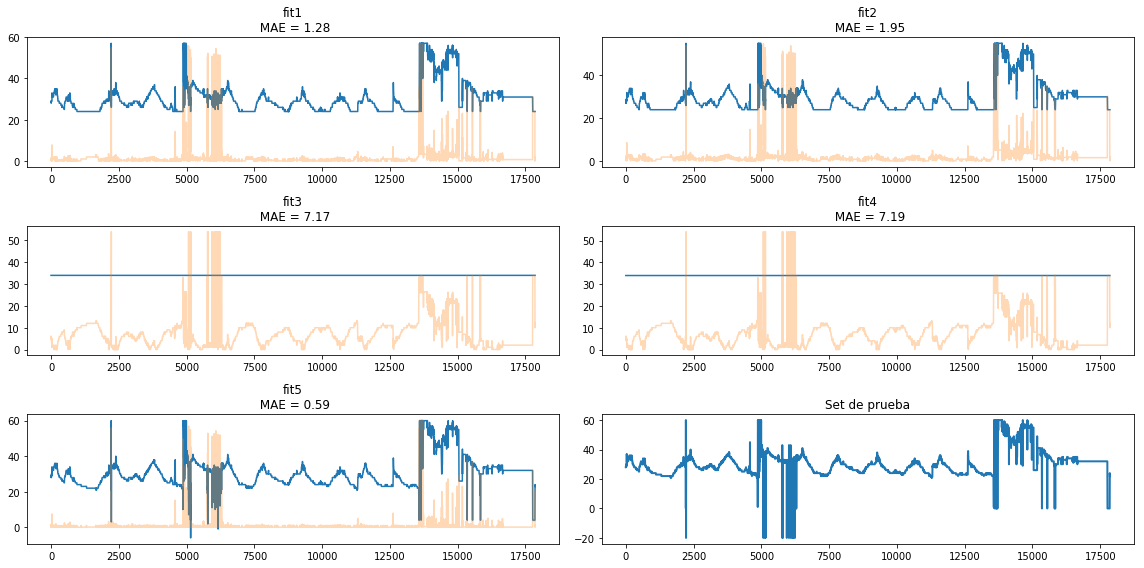

In [6]:
#y_ = scaler_y.inverse_transform(np.array(y).reshape((len(y),1)))
plt.figure(figsize=[16,8])
plt.subplot(3,2,6)
plt.plot(y,label='set de prueba',linewidth=2)
plt.title('Set de prueba')

for i in [1,2,5]:
    plt.subplot(3,2,i)
    f = vars()[('fit%s')%str(i)]
    p = f.predict(x)
    p = vars()[('pred%s')%str(i)] = scaler_y.inverse_transform(np.array(p).reshape((len(p),1)))
    p1 = mean_absolute_error(p, y)
    plt.plot(np.rint(p))
    plt.plot(abs(p-y),alpha=.3)
    plt.title('fit%d\n MAE = %.2f'%(i,p1))

for i in [3,4]:
    plt.subplot(3,2,i)
    f = vars()[('fit%s')%str(i)]
    p = f.predict(x,batch_size=1)
    p = vars()[('pred%s')%str(i)] = scaler_y.inverse_transform(np.array(p).reshape((len(p),1)))
    p1 = mean_absolute_error(p, y)
    plt.plot(np.rint(p))
    plt.title('fit%d\n MAE = %.2f'%(i,p1))
    plt.plot(abs(p-y),alpha=.3)
plt.tight_layout()

In [7]:
# Calcula el RMSE
for i in range(1,6):
    p = vars()[('pred%s')%str(i)]
    vars()[('mae%s')%str(i)] = mean_absolute_error(p, y)

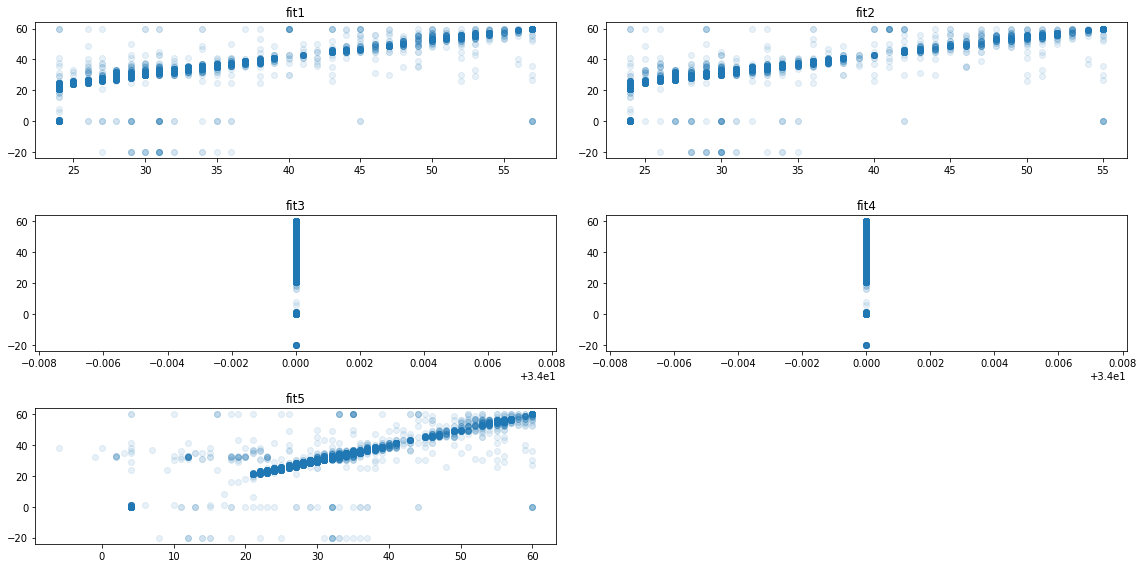

In [8]:
plt.figure(figsize=[16,8])
for i in range(1,6):
    plt.subplot(3,2,i)
    p = vars()[('pred%s')%str(i)]
    plt.scatter(np.rint(p),np.rint(y),alpha=.1)
    plt.title('fit%d'%i)
plt.tight_layout()

In [9]:
VAmo a probar con todos los datos a ve qué pasa y también probar metiendo los datos uno a uno ;D

SyntaxError: invalid syntax (<ipython-input-9-492349f33dba>, line 1)

In [ ]:
7.63,7.63,7.51